In [1]:
# All Imports
import sys 
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import collections
#from sklearn.neighbors import NearestNeighbors
#from gensim.test.utils import common_texts

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile

In [36]:
with open('test_documents2.json','r') as f:
    test_documents = json.load(f)

In [3]:
with open('train_documents.json','r') as f:
    train_documents = json.load(f)

In [37]:
#train_documents = [TaggedDocument(i[0],i[1]) for i in train_documents]
test_documents = [TaggedDocument(i[0],i[1]) for i in test_documents]

In [38]:
print(len(test_documents),test_documents[5])

18702 TaggedDocument(['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'you', 'you', 'you', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'and', 'and', 'a', 'a', 'me', 'it', 'it', 'it', 'it', 'my', 'my', 'is', 'is', 'your', 'on', 'on', 'are', 'are', 'are', 'are', 'am', 'am', 'be', 'be', 'so', 'this', 'what', 'what', 'what', 'when', 'time', 'come', 'go', 'down', 'down', 'down', 'if', 'if', 'want', 'want', 'want', 'make', 'make', 'make', 'make', 'say', 'say', 'say', 'say', 'say', 'say', 'day', 'at', 'where', 'more', 'more', 'more', 'more', 'still', 'still', 'still', 'still', 'leav', 'had', 'had', 'had', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'stay', 'new', 'new', 'than', 'than', 'than', 'than', 'thought', 'without', 'put', 'put', 'put', 'put', 'other', 'other', 'other', 'other', 'found', 'sound', 'best', 'best', 'best', 'best', 'town', 'town', 'sometim

In [5]:
with open('word_counts.json','r') as xc:
    word_count_dict= json.load(xc)

In [6]:
model = Doc2Vec(vector_size=25, epochs=3, window=5, min_count=2, workers=4)

model.build_vocab_from_freq(word_count_dict)

In [45]:
#model.train(train_documents, total_examples=model.corpus_count, epochs=model.epochs)

TypeError: Either one of corpus_file or documents value must be provided

In [8]:
model = Doc2Vec(documents=train_documents, vector_size=15, epochs=4, window=5, min_count=5, workers=4)
fname = get_tmpfile("lyrics2vec_model")
model.save(fname)
  # you can continue training with the loaded model!

In [9]:
model.save("word2vec2.model")
#model = Doc2Vec.load("word2vec.model")

In [39]:
inferred_vectors = []

for doc_id in range(len(test_documents)):
    inferred_vector = model.infer_vector(test_documents[doc_id].words)
    inferred_vectors.append([inferred_vector, test_documents[doc_id].tags])

In [40]:
#genres = [i['primary_genres']['music_genre_list'][0]['music_genre']['music_genre_parent_id'] for i in tracks]
genres = [i[1][1] for i in inferred_vectors]
unique_colors = list(set(genres))
print(len(unique_colors))
colors = [unique_colors.index(i) for i in genres]


132


In [43]:
X = np.array([i[0] for i in inferred_vectors])
X_embedded = TSNE(n_components=2,init='random', random_state=0, perplexity=20).fit_transform(X)
X_embedded.shape

(18702, 2)

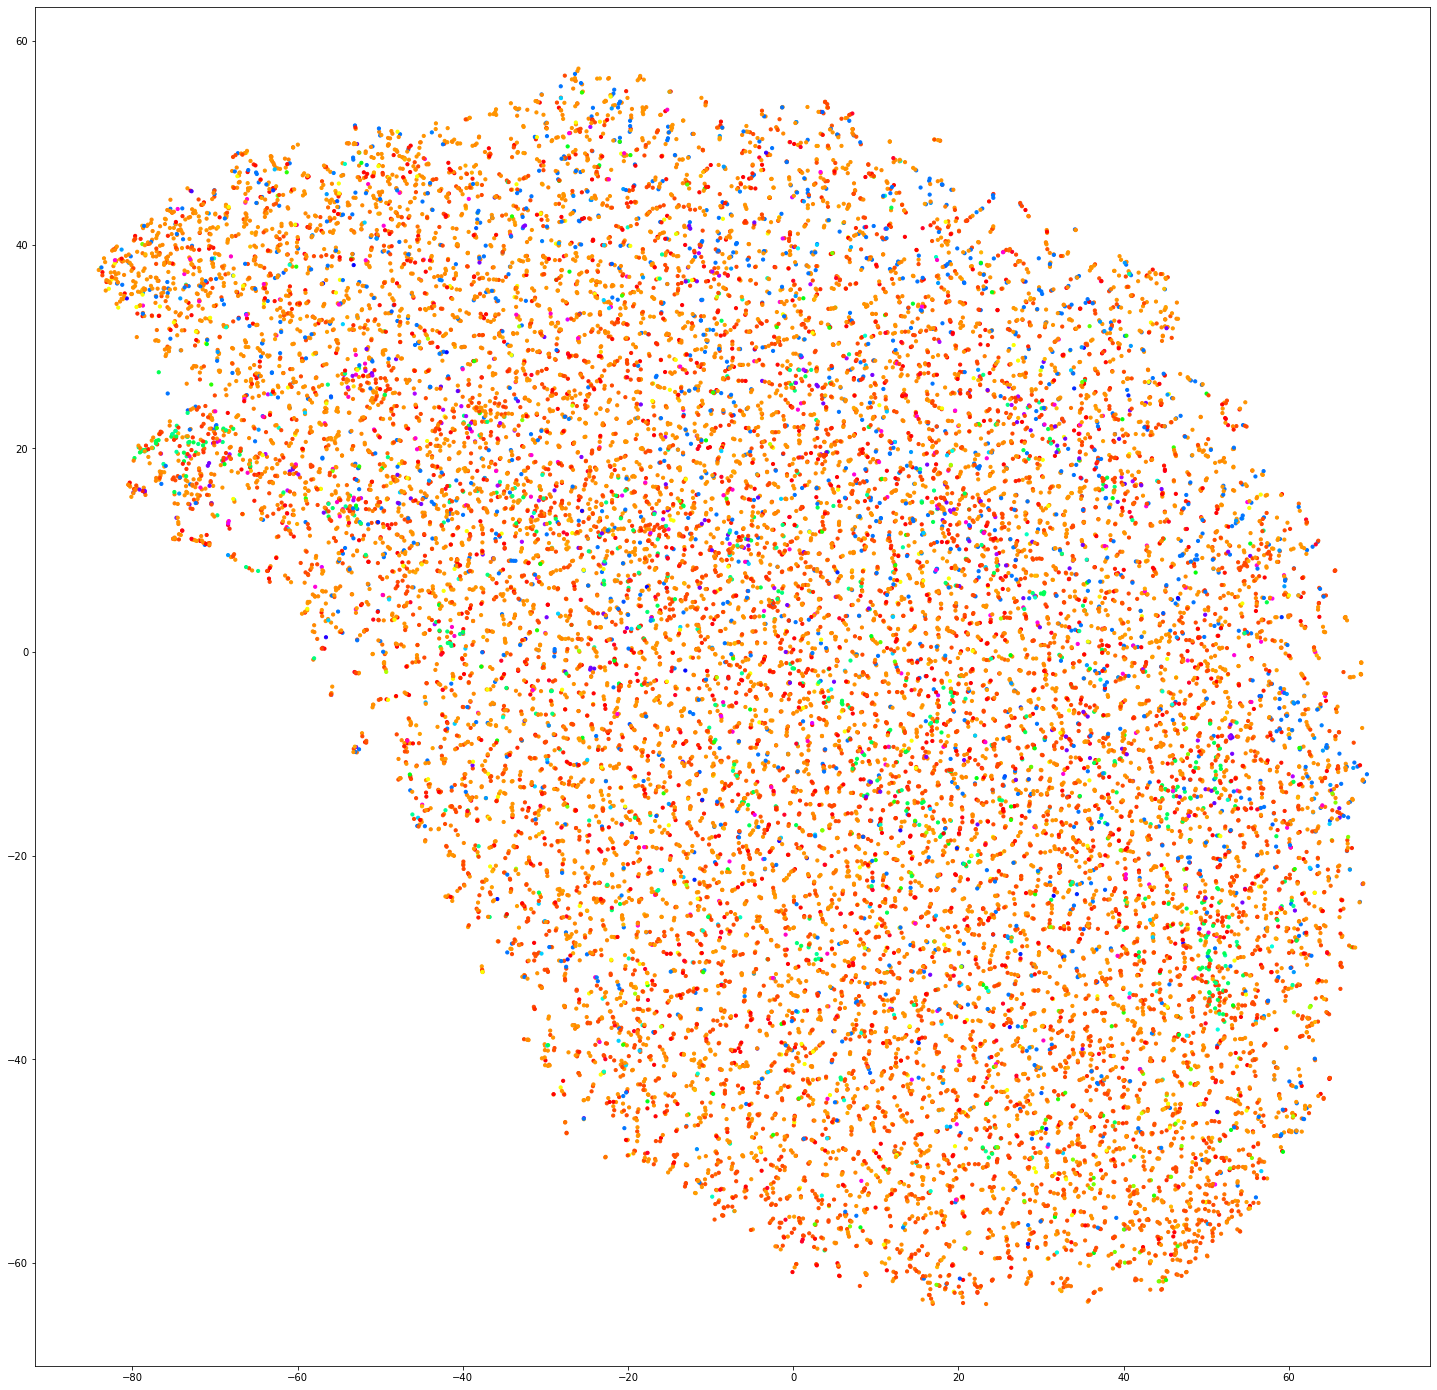

In [44]:
plt.figure(figsize=(25, 25))

plt.scatter([i[0] for i in X_embedded],[i[1] for i in X_embedded],c=colors,cmap='gist_rainbow', s=10)

In [51]:
#set([i['primary_genres']['music_genre_list'][0]['music_genre']['music_genre_parent_id'] for i in tracks])

counter = collections.Counter(colors)
print(counter)

Counter({18: 4784, 11: 3696, 17: 2971, 90: 1219, 4: 681, 15: 486, 19: 471, 12: 462, 5: 379, 7: 319, 29: 246, 9: 237, 8: 232, 60: 228, 0: 172, 14: 160, 16: 149, 112: 135, 64: 121, 21: 106, 86: 95, 128: 92, 130: 82, 89: 79, 20: 74, 6: 68, 81: 59, 117: 57, 49: 50, 13: 50, 67: 48, 92: 41, 55: 37, 71: 37, 62: 36, 22: 33, 41: 28, 127: 24, 40: 21, 65: 21, 2: 19, 1: 18, 97: 15, 3: 15, 66: 14, 93: 14, 63: 14, 10: 13, 48: 13, 113: 12, 104: 12, 122: 12, 110: 11, 74: 10, 44: 10, 118: 9, 33: 8, 36: 8, 37: 8, 53: 7, 69: 7, 61: 7, 54: 7, 100: 6, 126: 6, 129: 6, 23: 5, 120: 5, 47: 5, 84: 5, 80: 4, 119: 4, 123: 4, 72: 4, 83: 4, 59: 3, 38: 3, 52: 3, 34: 3, 73: 3, 24: 3, 25: 3, 70: 3, 87: 3, 30: 3, 88: 3, 56: 2, 101: 2, 106: 2, 68: 2, 105: 2, 26: 2, 131: 2, 46: 2, 111: 2, 43: 2, 32: 2, 35: 2, 77: 2, 39: 2, 51: 2, 116: 2, 109: 1, 99: 1, 108: 1, 58: 1, 27: 1, 75: 1, 121: 1, 42: 1, 91: 1, 114: 1, 125: 1, 98: 1, 82: 1, 31: 1, 28: 1, 95: 1, 107: 1, 57: 1, 94: 1, 76: 1, 103: 1, 115: 1, 102: 1, 45: 1, 96: 1, 12

In [32]:
#new_test_docs = []

for j in range(len(train_documents)):
    for i in range(len(test_documents1)):
        if test_documents1[i][1][0] == train_documents[j][1][0]:
            new_test_docs.append([train_documents[j][0],test_documents1[i][1]])
            break
    if len(new_test_docs) >= 18702:
        break
print(len(new_test_docs),len(test_documents1),len(test_documents))

18702 18702 27143


In [26]:
#with open('newInfos.json','r') as f:
#    tracks_genres = json.load(f)

In [38]:
with open('test_documents.json','r') as file:
    test_tracks = json.load(file) 

In [42]:
new_test_documents = []
for (did,doc) in test_tracks.items():
    words = []
    for (word,count) in doc.items():
        letters = word_dump[int(word)-1]
        words += [letters  for i in range(int(count))]
    new_test_documents.append([words,[did]])

[['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'you', 'to', 'to', 'to', 'and', 'and', 'and', 'and', 'a', 'a', 'a', 'me', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'it', 'not', 'not', 'not', 'in', 'my', 'my', 'my', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'is', 'of', 'of', 'of', 'of', 'your', 'your', 'your', 'your', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'that', 'do', 'on', 'are', 'am', 'all', 'all', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'love', 'so', 'so', 'so', 'so', 'so', 'know', 'know', 'this', 'this', 'this', 'this', 'but', 'but', 'what', 'what', 'just', 'just', 'when', 'when', 'when', 'when', 'when', 'when', 'when', 

In [49]:
docs_t = []
for i in range(len(new_test_documents)):
    for j in range(len(test_documents1)):
        if new_test_documents[i][1][0] == test_documents1[j][1][0]:
            docs_t.append([new_test_documents[i][0],test_documents1[j][1]])

[['i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'i', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'the', 'you', 'you', 'you', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'to', 'and', 'and', 'a', 'a', 'me', 'it', 'it', 'it', 'it', 'my', 'my', 'is', 'is', 'your', 'on', 'on', 'are', 'are', 'are', 'are', 'am', 'am', 'be', 'be', 'so', 'this', 'what', 'what', 'what', 'when', 'time', 'come', 'go', 'down', 'down', 'down', 'if', 'if', 'want', 'want', 'want', 'make', 'make', 'make', 'make', 'say', 'say', 'say', 'say', 'say', 'say', 'day', 'at', 'where', 'more', 'more', 'more', 'more', 'still', 'still', 'still', 'still', 'leav', 'had', 'had', 'had', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'alon', 'stay', 'new', 'new', 'than', 'than', 'than', 'than', 'thought', 'without', 'put', 'put', 'put', 'put', 'other', 'other', 'other', 'other', 'found', 'sound', 'best', 'best', 'best', 'best', 'town', 'town', 'sometim', 'sometim', 'ani',

In [28]:
print(len(docs_t))

NameError: name 'docs_t' is not defined

In [27]:
tracks = []
for i in inferred_vectors:
    tracks.append(tracks_genres[i[1][0]])